# League of Legends First 10 Minutes Impact
This is a notebook studying the impact of the first 10 minutes on the outcome of the game.
First, download the kaggle dataset.

In [70]:
import kagglehub

# path = kagglehub.dataset_download("bobbyscience/league-of-legends-diamond-ranked-games-10-min")
# print(path)

Personally, this downloaded the file to a cache on my machine.
I moved the file to another folder in this repository labeled 'dataset'.
Next we can import pandas and perform some calculations.

In [71]:
import pandas as pd

# Import the dataset
df = pd.read_csv('dataset/high_diamond_ranked_10min.csv')
df.head(10)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,4475365709,1,18,0,0,5,3,6,1,1,...,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,1,18,3,1,7,6,7,1,1,...,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
7,4496759358,0,16,2,0,5,13,3,0,0,...,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
8,4443048030,0,16,3,0,7,7,8,0,0,...,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0
9,4509433346,1,13,1,1,4,5,5,1,1,...,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5


## Winrate & Games Won

In [72]:
# Calculate winrate for blue across all games
# Naturally, this is a zero-sum game, so the winrate for our sample is close to 0.50
blueGamesWon = df['gameId'].where(df['blueWins'] == 1).count()
blueWinrate = blueGamesWon/len(df)
redGamesWon = df['gameId'].where(df['blueWins'] == 0).count()
redWinrate = redGamesWon/len(df)

print('Blue Wins:', blueWinrate)
print(blueGamesWon, '/', len(df))
print('Red Wins:', redWinrate)
print(redGamesWon, '/', len(df))

Blue Wins: 0.4990383642069035
4930 / 9879
Red Wins: 0.5009616357930965
4949 / 9879


## First Blood

In [73]:
# Calculate the intersection of games where a team wins and gets first blood
# This describes the number of games where a team won AND had first blood
FBWins = df['gameId'].where(df['blueWins'] == df['blueFirstBlood']).count()
print('Winning games with first blood:', FBWins, '/', len(df))
print(FBWins / len(df))

Winning games with first blood: 5936 / 9879
0.6008705334548031


From this, we can gather that both sides win more games when they get first blood.
They win more by about 10.09%.
Below, we see that there is no difference between whether the team is red or blue.
As long as they get first blood, they have a better chance of winning.

          Blue First Blood  Red First Blood
blueWins                                   
False                 2000             2949
True                  2987             1943


<Axes: title={'center': 'First Blood Affect on Wins'}, xlabel='Blue Wins', ylabel='Count of First Blood'>

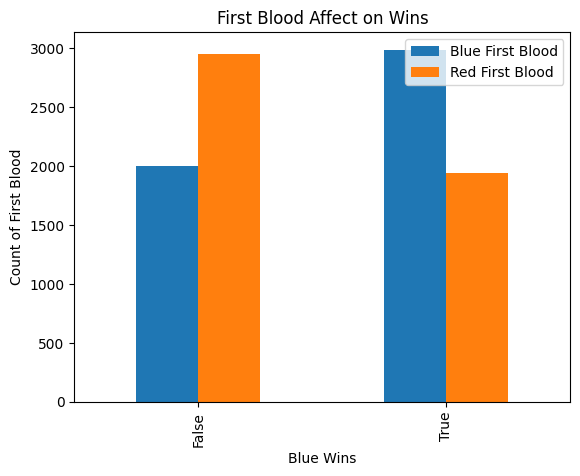

In [74]:
# This describes the number of games where blue won, depending on if they drew first blood or not
# True is the number of games where blue drew first blood, then won
# False is the number of games where blue did not draw first blood, then won
blueGotFirstBlood = df['blueWins'].astype(bool).where(df['blueFirstBlood'] == 1).value_counts()
redGotFirstBlood = df['blueWins'].astype(bool).where(df['blueFirstBlood'] == 0).value_counts()
plt = pd.DataFrame({'Blue First Blood': blueGotFirstBlood, 'Red First Blood': redGotFirstBlood})
print(plt)

plt.plot(kind='bar', xlabel='Blue Wins', ylabel='Count of First Blood', title='First Blood Affect on Wins')

## Greater Average Level at 10 Minutes

In [75]:
# Calculate the intersection of games where a side wins and has a level advantage @ 10 mins
blueGreaterAverageLevelWin = df['gameId'].where(df['blueWins'] == 1).where(df['blueAvgLevel'] > df['redAvgLevel']).count()
redGreaterAverageLevelWin  = df['gameId'].where(df['blueWins'] == 0).where(df['blueAvgLevel'] < df['redAvgLevel']).count()
blueGreaterAverageLevelWinrate = blueGreaterAverageLevelWin/blueGamesWon
redGreaterAverageLevelWinrate = blueGreaterAverageLevelWin/redGamesWon
winrateGreaterAverageLevel = (redGreaterAverageLevelWinrate + blueGreaterAverageLevelWinrate) / 2

print('Winrate for Greater Avg Level @ 10 mins:', winrateGreaterAverageLevel)

Winrate for Greater Avg Level @ 10 mins: 0.5893330838651609


Above, we can see that the team that has a higher average level at 10 minutes has a higher winrate by about 8.93%.
Getting ahead early has a substantial impact on the game's outcome.
We should see the same trend with cs at 10 mins as well.

## More CS at 10 Minutes

In [76]:
# Calculate the intersection of games where a side wins and has a CS advantage @ 10 mins
blueMoreCSWin = df['gameId'].where(df['blueWins'] == 1).where(df['blueCSPerMin'] > df['redCSPerMin']).count()
redMoreCSWin = df['gameId'].where(df['blueWins'] == 0).where(df['blueCSPerMin'] < df['redCSPerMin']).count()
blueMoreCSWinrate = blueMoreCSWin / blueGamesWon
redMoreCSWinrate = redMoreCSWin / redGamesWon
winrateMoreCS = (blueMoreCSWinrate + redMoreCSWinrate) / 2
print('Winrate for more cs at 10 minutes:', winrateMoreCS)

Winrate for more cs at 10 minutes: 0.6198820668588364


A winrate of 56.43% using cs at 10 minutes indicates a 6.43% increase.
This, although less drastic than previously seen, is still an indicator of the game's outcome after 10 minutes.

## More Gold at 10 Minutes

In [77]:
# Calculate the intersection of games where a side wins and has a gold advantage @ 10 mins
blueMoreGoldWin = df['gameId'].where(df['blueWins'] == 1).where(df['blueGoldDiff'] > 0).count()
redMoreGoldWin = df['gameId'].where(df['blueWins'] == 0).where(df['blueGoldDiff'] < 0).count()
blueMoreGoldWinrate = blueMoreGoldWin / blueGamesWon
redMoreGoldWinrate = redMoreGoldWin / redGamesWon
winrateMoreGold = (blueMoreGoldWinrate + redMoreGoldWinrate) / 2

print('Winrate for more gold at 10 minutes:', winrateMoreGold)

Winrate for more gold at 10 minutes: 0.7227502267550927


This result shows a 22.27% increase in winrate for having more gold as a team than your opponent at 10 minutes. This is perhaps the greatest indicator of how well a team is doing compared to the other team, and the greatest indicator of which team will win the game.

          Blue Has More Gold  Red Has More Gold
blueWins                                       
False                   1384               3564
True                    3576               1353


<Axes: title={'center': 'Gold Difference Affect on Wins'}, xlabel='Blue Wins', ylabel='Count of More Gold'>

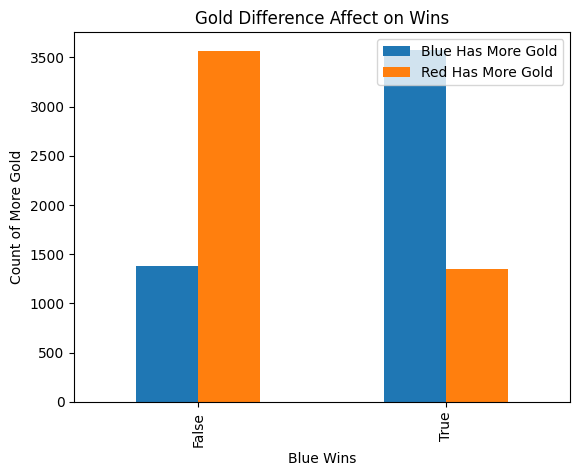

In [78]:
# This describes the number of games where blue won, depending on if they drew first blood or not
# True is the number of games where blue drew first blood, then won
# False is the number of games where blue did not draw first blood, then won
blueHasMoreGold = df['blueWins'].astype(bool).where(df['blueGoldDiff'] > 0).value_counts()
redHasMoreGold = df['blueWins'].astype(bool).where(df['blueGoldDiff'] < 0).value_counts()
plt = pd.DataFrame({'Blue Has More Gold': blueHasMoreGold, 'Red Has More Gold': redHasMoreGold})
print(plt)

plt.plot(kind='bar', xlabel='Blue Wins', ylabel='Count of More Gold', title='Gold Difference Affect on Wins')